### 5. Analiza zbioru danych New YorkTimes

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [161]:
df = pd.read_csv('./data/nyt-frame.csv', header=0)
data = df.iloc[:, 9:]
array = data.values
data


,abandoned,abc,ability,able,about,above,abroad,absorbed,absorbing,abstract,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,0.0,0.0,0.0,0.000000,0.053266,0.000000,0.000000,0.0,0.0,0.021566,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.039866,0.000000,0.000000,0.000000,0.0,0.0,0.043458,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.053641,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.012511,0.000000,0.041018,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.048151,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.0,0.0,0.0,0.000000,0.016956,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.024425,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.000000,0.000000,0.087156,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.000000,0.034346,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.029686,0.015659,0.0,0.026605,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.066953,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [162]:
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)


['yogi' 'seeking' 'amid' 'tapes' 'female' 'transformations' 'witnesses'
 'tuesday' 'gone' 'cease' 'harmonies' 'brass' 'west' 'partner' 'are'
 'suit' 'nondescript' 'shrill' 'historic' 'calling']


In [163]:
pca = PCA()
X_pca = pca.fit_transform(array)


In [164]:

fst = pca.components_[0]

fst_names = list(zip(fst, data.columns.values))

fst_max_15 = sorted(fst_names, key=lambda x: x[0], reverse=True)[:15]

fst_max_15


[(0.26127391890531587, 'she'),
 (0.24529311441720675, 'her'),
 (0.20211292705699738, 'ms'),
 (0.15028278883843357, 'i'),
 (0.13360556763625311, 'said'),
 (0.10687219119361743, 'mother'),
 (0.10300939205022899, 'cooper'),
 (0.09432521211958252, 'my'),
 (0.08788709841748935, 'painting'),
 (0.07119630147343924, 'process'),
 (0.06988483529500195, 'paintings'),
 (0.06857385461154239, 'im'),
 (0.06562096808145768, 'mrs'),
 (0.06531001248089248, 'he'),
 (0.06379278250161478, 'me')]

^ 15 elementów o największej wartości pierwszego komponentu wiodącego. Odpowiadają one słowm związanym ze sztuką, jak np. 'painting', 'paintings'.

In [165]:
fst_min_15 = sorted(fst_names, key=lambda x: x[0])[:15]

fst_min_15


[(-0.11211617341838434, 'music'),
 (-0.0878073164338167, 'trio'),
 (-0.07404600988801385, 'theater'),
 (-0.06926899826753337, 'orchestra'),
 (-0.058590609670586435, 'composers'),
 (-0.055553640967300894, 'opera'),
 (-0.05117796156989034, 'theaters'),
 (-0.04902545227080579, 'm'),
 (-0.049001383290293785, 'program'),
 (-0.048818826144997315, 'players'),
 (-0.04812333139017815, 'festival'),
 (-0.04794086893749094, 'east'),
 (-0.04791174835954268, 'y'),
 (-0.04603235412282292, 'jersey'),
 (-0.04493077625468051, 'symphony')]

^ 15 elementów o najmniejszej wartości pierwszego komponentu wiodącego. Odpowiadają one słowm związanym z muzyką, jak np. 'music', 'trio', 'orchestra'.

In [166]:
snd = pca.components_[1]

snd_names = list(zip(snd, data.columns.values))

snd_max_15 = sorted(snd_names, key=lambda x: x[0], reverse=True)[:15]

snd_max_15


[(0.22078475821587348, 'her'),
 (0.21307376342525283, 'she'),
 (0.1623905985100136, 'theater'),
 (0.1299263753545694, 'opera'),
 (0.12447032686713268, 'ms'),
 (0.08120155281056647, 'i'),
 (0.08075865381307722, 'hour'),
 (0.07465343667556089, 'sang'),
 (0.07415772534187783, 'production'),
 (0.07300940791699438, 'festival'),
 (0.07234461523901559, 'music'),
 (0.07070817873039478, 'musical'),
 (0.06923167953630353, 'songs'),
 (0.06760285785600799, 'orchestra'),
 (0.06758794058200351, 'vocal')]

^ 15 elementów o największej wartości drugiego komponentu wiodącego. Odpowiadają one słowm związanym z muzyką, jak np. 'music', 'festival', 'orchestra'.

In [167]:
snd_min_15 = sorted(snd_names, key=lambda x: x[0])[:15]

snd_min_15


[(-0.15431673143840435, 'art'),
 (-0.12089946277617691, 'museum'),
 (-0.09522680440744602, 'images'),
 (-0.09263497758879576, 'artists'),
 (-0.07765780277980369, 'donations'),
 (-0.07539497668344301, 'museums'),
 (-0.07401963974238235, 'painting'),
 (-0.07226860058901613, 'tax'),
 (-0.06564345120814832, 'paintings'),
 (-0.060353138718405516, 'sculpture'),
 (-0.05515928883067876, 'gallery'),
 (-0.051479139293811205, 'sculptures'),
 (-0.050138313462929025, 'painted'),
 (-0.04966737533217039, 'white'),
 (-0.04666421975711604, 'service')]

^ 15 elementów o najmniejszej wartości drugiego komponentu wiodącego. Odpowiadają one słowm związanym ze sztuką, jak np. 'art', 'museum', 'images'.

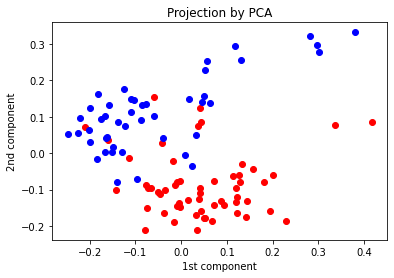

In [168]:
reds = df.loc[df['class.labels'] == 'art'].index
blues = df.loc[df['class.labels'] == 'music'].index

plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()


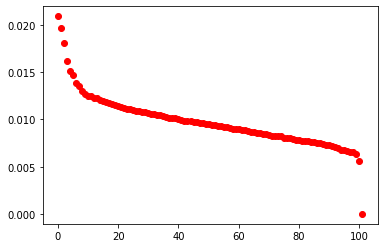

0.15773478029003496


In [169]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[0:10]))


Po wykonaniu projekcji na pierwsze 10 komponentów wiodących zachowane zostaje ~0.16 wariancji.

### 6. Analiza zbioru danych 04Cars

In [170]:
df = pd.read_csv('./data/04cars-data.csv', header=0)
data = df.iloc[:, -11:]
data


,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,23820,21761,2.0,4,200,24,31,2778,101,172,68
...,...,...,...,...,...,...,...,...,...,...,...
382,37730,35542,2.9,6,208,20,28,3576,110,190,72
383,45210,42573,2.9,6,268,19,26,3653,110,190,72
384,26135,24641,1.9,4,170,22,29,2822,101,180,68
385,35145,33112,2.5,5,208,20,27,3823,109,186,73


In [171]:
data = (data-data.mean())/data.std()
data


,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,0.533537,0.478926,0.367351,0.162996,0.150230,-0.439475,-0.579057,0.492267,1.098999,0.909409,0.214799
1,0.652424,0.595455,0.367351,0.162996,0.150230,-0.439475,-0.579057,0.510681,1.098999,0.909409,0.214799
2,0.188283,0.161796,0.367351,0.162996,0.719521,-0.629504,-0.756487,1.301045,-0.171012,0.305088,1.699215
3,2.866153,2.767267,0.071585,0.162996,1.075328,-0.629504,-0.579057,-0.537472,-1.017686,-0.828013,-0.082084
4,-0.477128,-0.484865,-1.111480,-1.179122,-0.205577,0.700704,0.662958,-1.068631,-0.876574,-0.979094,-0.972733
...,...,...,...,...,...,...,...,...,...,...,...
382,0.228081,0.284973,-0.224181,0.162996,-0.091719,-0.059415,0.130666,0.061675,0.393437,0.380629,0.214799
383,0.607302,0.677740,-0.224181,0.162996,0.762218,-0.249445,-0.224195,0.170739,0.393437,0.380629,0.214799
384,-0.359762,-0.323982,-1.210069,-1.179122,-0.632546,0.320645,0.308097,-1.006308,-0.876574,-0.374773,-0.972733
385,0.097027,0.149227,-0.618536,-0.508063,-0.091719,-0.059415,-0.046765,0.411531,0.252325,0.078468,0.511682


In [172]:
array = data.values

pca = PCA()
X_pca = pca.fit_transform(array)


Wykres zależności bezwzględnej wartości wariancji od numeru kierunku wiodącego k.

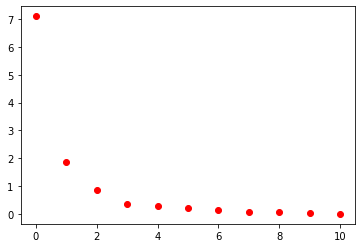

In [173]:
variance = pca.explained_variance_
plt.plot(variance, 'ro')
plt.show()


Wykres zależności względnej wartości wariancji od numeru kierunku wiodącego k.

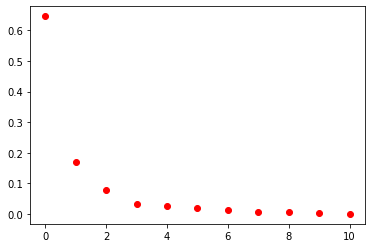

0.8171421089701889
0.894390134894234


In [174]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[0:2]))
print(sum(variance_ratio[0:3]))


Przy redukcji wymiarowości do 2, zachowane zostaje ~0.82 wariancji.

Przy redukcji wymiarowości do 3, zachowane zostaje ~0.89 wariancji.

In [175]:

fst = pca.components_[0]

fst_names = list(zip(fst, data.columns.values))

fst_names = sorted(fst_names, key=lambda x: x[0], reverse=True)

fst_names


[(0.3104817267323126, 'City MPG'),
 (0.3065886385804442, 'Hwy MPG'),
 (-0.2567901876706823, 'Len'),
 (-0.2623186387530946, 'Dealer Cost'),
 (-0.26375044344403437, 'Retail Price'),
 (-0.2662100335710543, 'Wheel Base'),
 (-0.29605459141706114, 'Width'),
 (-0.31860225848402907, 'HP'),
 (-0.3341887576286368, 'Cyl'),
 (-0.3363293669404878, 'Weight'),
 (-0.34708049202520086, 'Engine Size (l)')]

In [176]:
snd = pca.components_[1]

snd_names = list(zip(snd, data.columns.values))

snd_names = sorted(snd_names, key=lambda x: x[0], reverse=True)

snd_names


[(0.4701465851382261, 'Dealer Cost'),
 (0.4685086975025388, 'Retail Price'),
 (0.29221347613918225, 'HP'),
 (0.07803201087501868, 'Cyl'),
 (-0.0033659357616592223, 'City MPG'),
 (-0.010964460145348714, 'Hwy MPG'),
 (-0.015347186463713802, 'Engine Size (l)'),
 (-0.16746357154787025, 'Weight'),
 (-0.3128913501625072, 'Width'),
 (-0.40841138066875465, 'Len'),
 (-0.4181771069592042, 'Wheel Base')]

Wartości bliskie 0 oznaczają elementy które w małym stopniu wpływają na "umiejscowienie" danego modelu samochodu na osi reprezentującej dany komponent.

Największe elementy pierwszego komponentu wiodącego odnoszą się do zużycia paliwa ('City MPG' i 'Hwy MPG').

Najmniejsze elementy pierwszego komponentu odnoszą się do wagi i pojemności silnika ('Weight', 'Engine Size (l)').

Największe elementy drugiego komponentu wiodącego odnoszą się do ceny samochodu.

Najmniejsze elementy drugiego komponentu wiodącego odnoszą się do wielkości samochodu ('Width', 'Len', 'Wheel Base')

In [177]:
X_pca = X_pca / 10


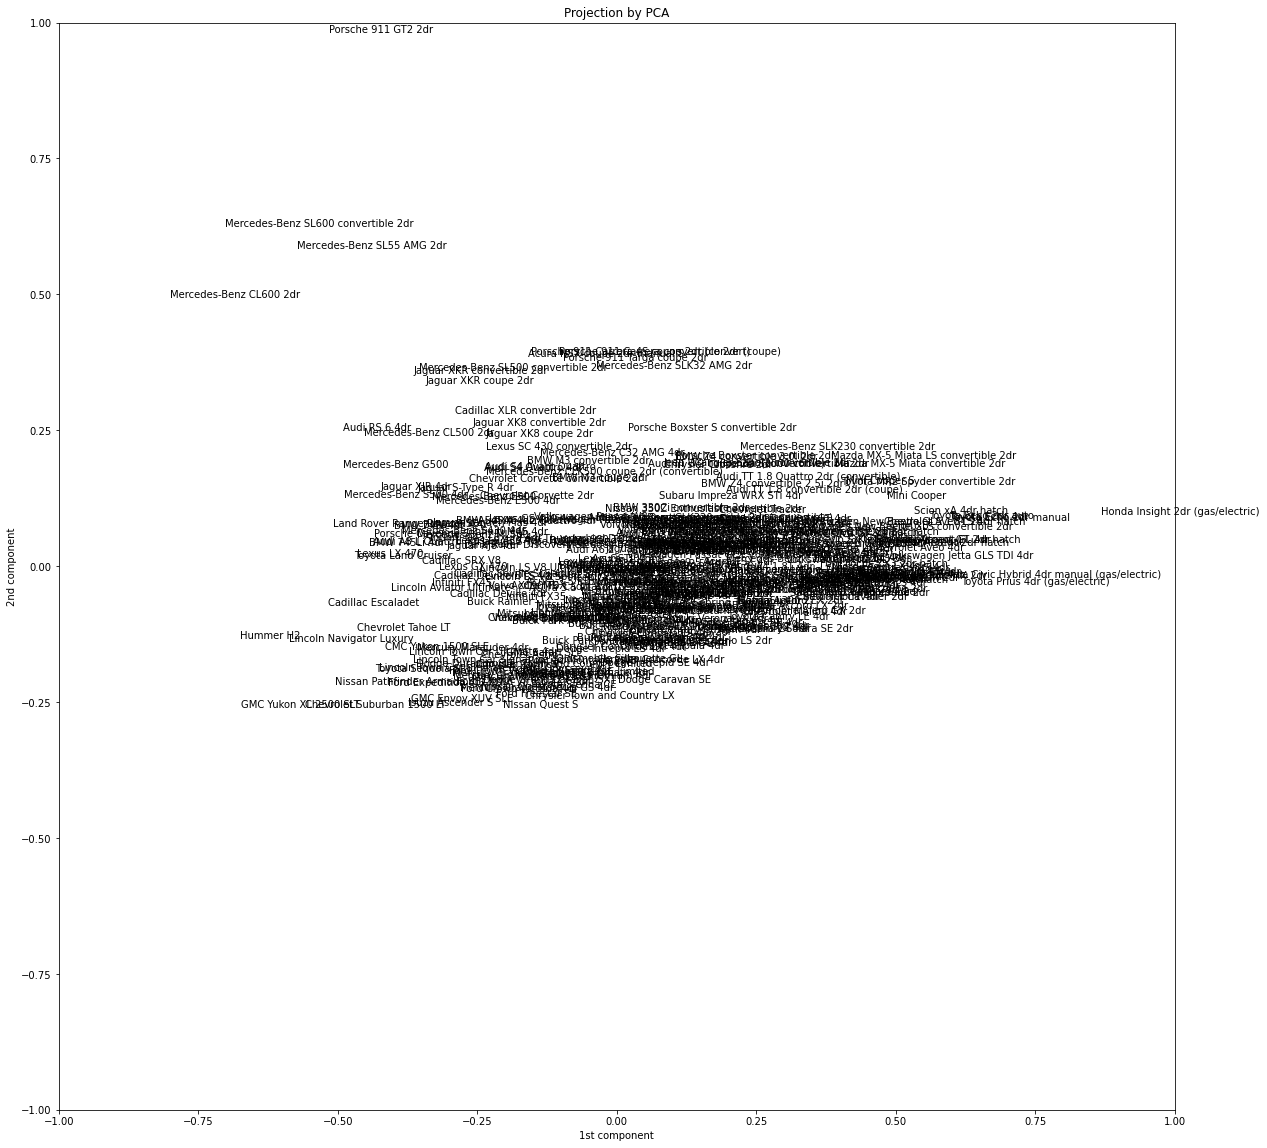

In [178]:
index_array = np.array(data.index)

x_points = X_pca[index_array, 0]
y_points = X_pca[index_array, 1]
names = df['Vehicle Name'][index_array]

plt.figure(figsize=(20, 20))
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.xlim([-1, 1])
plt.ylim([-1, 1])

for (x, y, name) in zip(x_points, y_points, names):
    plt.text(x, y, name, fontsize=10)

plt.show()


W lewej górnej ćwiartce wykresu znajdują się samochody sportowe.

W lewej dolnej ćwiartce znajdują się samochody terenowe/SUV.

Po prawej znajdują się samochody miejskie. 

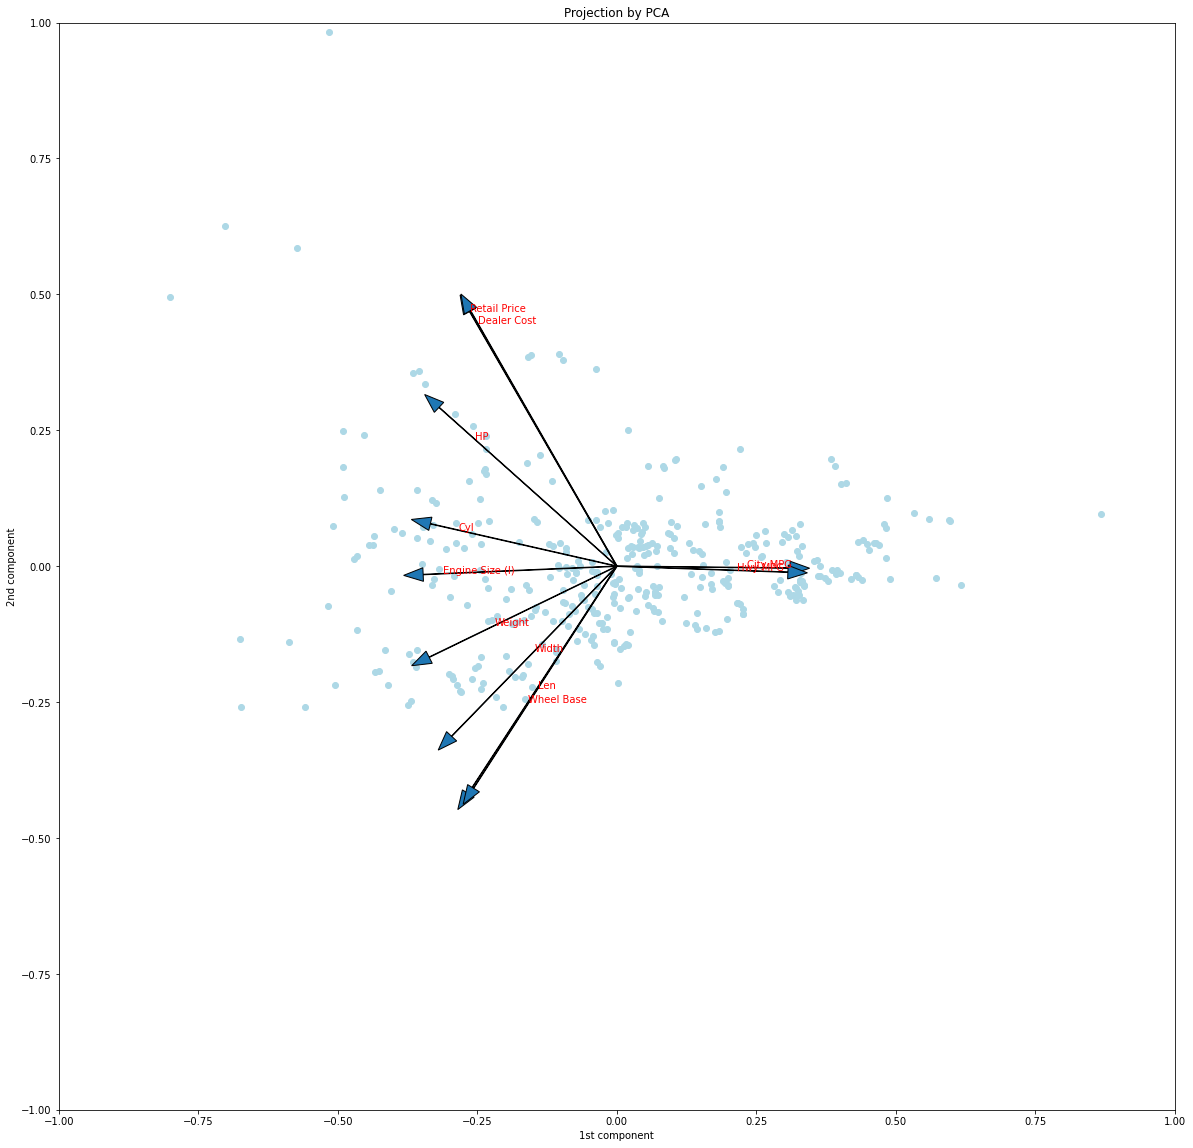

In [180]:
plt.figure(figsize=(20, 20))
plt.scatter(x_points, y_points, c='lightblue')
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.xlim([-1, 1])
plt.ylim([-1, 1])

for (i, x, y, name) in zip(range(len(fst)), fst, snd, data.columns.values):
    plt.arrow(0, 0, x, y, head_width=0.025, head_length=0.035)
    # for better readability
    text_x = (100 - 5*i)/100 * x
    text_y = (100 - 5*i)/100 * y
    plt.text(text_x, text_y, name, fontsize=10, c='red')

plt.show()


Powyższy wykres pokazuje powiązania pomiędzy poszczególnymi "cechami" samochodów, jak również ich wpływ na rozmieszczenie poszczególnych modeli na wykresie.